# Energy Poverty Detection: Data Cleaning, Outlier Detection & EDA
## Low Carbon London Smart Meter Dataset Analysis
### MSc Applied AI and Data Science Dissertation

## 1. Import Required Libraries

### Initial Data Inspection

In [5]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statistical analysis
from scipy import stats
from scipy.stats import shapiro, normaltest, anderson

# Set visualization styles
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)

print("✓ All libraries imported successfully")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✓ All libraries imported successfully
Pandas version: 2.3.3
NumPy version: 1.26.4


## 2. Load Dataset

In [8]:
# Load the sampled dataset
df = pd.read_csv('energy_data_sampled_500k.csv')

print("="*70)
print("DATASET LOADED SUCCESSFULLY")
print("="*70)
print(f"Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("="*70)

DATASET LOADED SUCCESSFULLY
Dataset Shape: 500,000 rows × 4 columns
Memory Usage: 130.59 MB


## 3. Initial Data Exploration

In [123]:
# Display first few rows
print("\n📊 FIRST 10 ROWS OF DATASET")
print("="*70)
display(df.head(10))

# Display last few rows
print("\n📊 LAST 10 ROWS OF DATASET")
print("="*70)
display(df.tail(10))

# Display random sample
print("\n📊 RANDOM SAMPLE OF 10 ROWS")
print("="*70)
display(df.sample(10, random_state=42))

# Basic dataset information
print("\n📋 DATASET INFORMATION")
print("="*70)
df.info()

# Column names and data types
print("\n📝 COLUMN DETAILS")
print("="*70)
for idx, (col, dtype) in enumerate(zip(df.columns, df.dtypes), 1):
    print(f"{idx}. {col:30s} | {str(dtype):15s}")


📊 FIRST 10 ROWS OF DATASET


,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC001173,Std,2013-05-21 08:30:00.0000000,0.169
1,MAC000162,Std,2014-01-14 09:30:00.0000000,0.06
2,MAC000627,Std,2012-04-15 22:00:00.0000000,0.378
3,MAC001124,Std,2012-12-23 09:30:00.0000000,0.327
4,MAC003181,Std,2013-01-07 21:30:00.0000000,0.377
5,MAC002415,Std,2013-04-08 00:30:00.0000000,0.144
6,MAC004092,Std,2012-07-17 02:00:00.0000000,0.012
7,MAC000288,ToU,2012-06-17 13:30:00.0000000,0.07
8,MAC003140,ToU,2012-10-03 21:30:00.0000000,0.34
9,MAC003036,Std,2013-03-20 11:30:00.0000000,0.098



📊 LAST 10 ROWS OF DATASET


,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
499990,MAC002508,ToU,2012-10-15 19:00:00.0000000,0.147
499991,MAC001353,Std,2012-07-04 06:30:00.0000000,0.26
499992,MAC001434,Std,2013-10-28 11:30:00.0000000,0.065
499993,MAC003498,Std,2014-01-21 22:30:00.0000000,0.174
499994,MAC000376,Std,2012-07-14 04:00:00.0000000,0
499995,MAC001674,Std,2012-12-31 20:00:00.0000000,0.295
499996,MAC003173,Std,2012-12-06 12:30:00.0000000,0.199
499997,MAC001555,Std,2012-07-04 09:00:00.0000000,0.045
499998,MAC002746,Std,2012-07-28 17:00:00.0000000,0.107
499999,MAC000345,Std,2013-02-18 05:00:00.0000000,0.075



📊 RANDOM SAMPLE OF 10 ROWS


,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
104241,MAC005015,Std,2012-02-23 23:30:00.0000000,0.071
199676,MAC003923,Std,2013-12-01 07:00:00.0000000,0.306
140199,MAC005209,Std,2012-11-30 00:00:00.0000000,0.064
132814,MAC001043,Std,2013-03-11 04:30:00.0000000,0
408697,MAC002205,Std,2012-07-03 08:30:00.0000000,0.087
163280,MAC003514,Std,2013-09-21 18:00:00.0000000,0.221
215758,MAC003284,Std,2013-04-24 04:30:00.0000000,0.083
442316,MAC004565,Std,2012-01-05 07:30:00.0000000,0.455
6940,MAC002876,Std,2012-08-18 01:30:00.0000000,0.109
382310,MAC002211,Std,2013-07-30 02:00:00.0000000,0.036



📋 DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   LCLid                    500000 non-null  object
 1   stdorToU                 500000 non-null  object
 2   DateTime                 500000 non-null  object
 3   KWH/hh (per half hour)   500000 non-null  object
dtypes: object(4)
memory usage: 15.3+ MB

📝 COLUMN DETAILS
1. LCLid                          | object         
2. stdorToU                       | object         
3. DateTime                       | object         
4. KWH/hh (per half hour)         | object         


## 4. Data Cleaning
### 4.1 Column Name Standardization

In [126]:
# Clean column names - remove extra spaces and standardize
print("\n🔧 CLEANING COLUMN NAMES")
print("="*70)

print("\nOriginal columns:")
print(df.columns.tolist())

# Strip whitespace and rename for clarity
df.columns = df.columns.str.strip()
df.rename(columns={
    'KWH/hh (per half hour)': 'energy_kwh',
    'LCLid': 'household_id',
    'stdorToU': 'tariff_type',
    'DateTime': 'timestamp'
}, inplace=True)

print("\nCleaned columns:")
print(df.columns.tolist())
print("\n✓ Column names standardized successfully")


🔧 CLEANING COLUMN NAMES

Original columns:
['LCLid', 'stdorToU', 'DateTime', 'KWH/hh (per half hour) ']

Cleaned columns:
['household_id', 'tariff_type', 'timestamp', 'energy_kwh']

✓ Column names standardized successfully


### 4.2 Data Type Conversion

In [228]:
# Convert timestamp to datetime
print("\n🔄 CONVERTING DATA TYPES")
print("="*70)

print("\nBefore conversion:")
print(df.dtypes)

# Convert timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Convert energy_kwh to numeric (handle any potential string values)
df['energy_kwh'] = pd.to_numeric(df['energy_kwh'], errors='coerce')

# Convert categorical variables
df['household_id'] = df['household_id'].astype('category')
df['tariff_type'] = df['tariff_type'].astype('category')

print("\nAfter conversion:")
print(df.dtypes)
print("\n✓ Data types converted successfully")

df.shape


🔄 CONVERTING DATA TYPES

Before conversion:
household_id          category
tariff_type           category
timestamp       datetime64[ns]
energy_kwh             float64
dtype: object

After conversion:
household_id          category
tariff_type           category
timestamp       datetime64[ns]
energy_kwh             float64
dtype: object

✓ Data types converted successfully


(500000, 4)

### 4.3 Missing Values Analysis


🔍 MISSING VALUES ANALYSIS

⚠️ Columns with missing values:


,Column,Missing_Count,Missing_Percentage,Data_Type
energy_kwh,energy_kwh,19,0.0038,float64


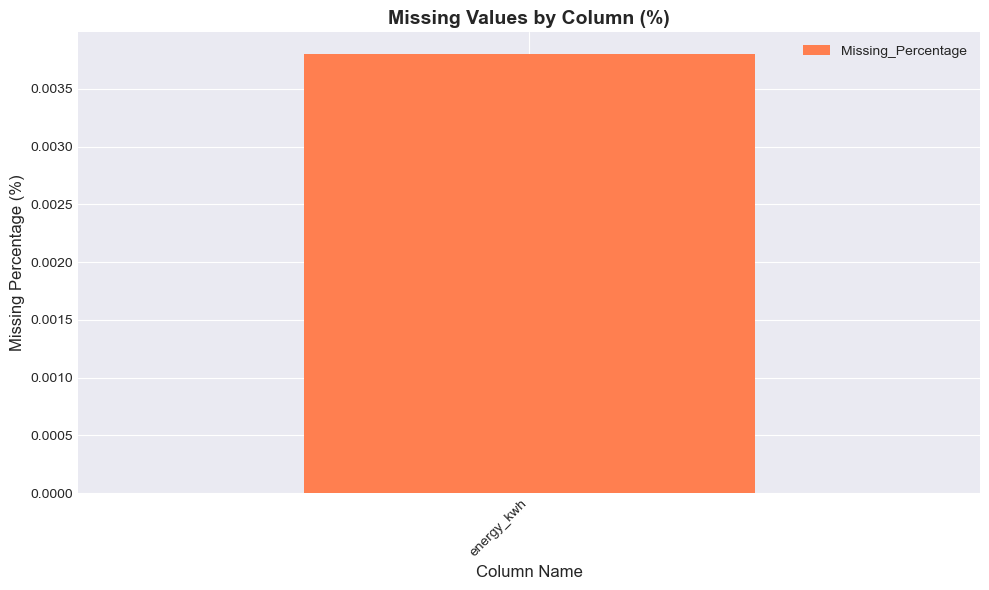


Total missing values: 19 (0.0010% of total data)


In [132]:
# Check for missing values
print("\n🔍 MISSING VALUES ANALYSIS")
print("="*70)

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
    'Data_Type': df.dtypes
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values(
    'Missing_Percentage', ascending=False
)

if len(missing_data) > 0:
    print("\n⚠️ Columns with missing values:")
    display(missing_data)
    
    # Visualize missing values
    fig, ax = plt.subplots(figsize=(10, 6))
    missing_data.plot(x='Column', y='Missing_Percentage', kind='bar', ax=ax, color='coral')
    plt.title('Missing Values by Column (%)', fontsize=14, fontweight='bold')
    plt.xlabel('Column Name', fontsize=12)
    plt.ylabel('Missing Percentage (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("\n✓ No missing values found in the dataset!")

# Total missing values
total_missing = df.isnull().sum().sum()
total_cells = np.product(df.shape)
print(f"\nTotal missing values: {total_missing:,} ({(total_missing/total_cells)*100:.4f}% of total data)")

### 4.4 Handle Missing Values

In [135]:
# Store original shape for comparison
original_shape = df.shape

print("\n🧹 HANDLING MISSING VALUES")
print("="*70)

# Drop rows with missing timestamps (critical for time series analysis)
df_cleaned = df.dropna(subset=['timestamp']).copy()
print(f"Rows removed due to missing timestamp: {original_shape[0] - df_cleaned.shape[0]:,}")

# Drop rows with missing energy values (target variable)
df_cleaned = df_cleaned.dropna(subset=['energy_kwh'])
print(f"Rows removed due to missing energy_kwh: {original_shape[0] - df_cleaned.shape[0]:,}")

# Drop rows with missing household_id or tariff_type
df_cleaned = df_cleaned.dropna(subset=['household_id', 'tariff_type'])

print(f"\nOriginal dataset: {original_shape[0]:,} rows")
print(f"Cleaned dataset: {df_cleaned.shape[0]:,} rows")
print(f"Rows removed: {original_shape[0] - df_cleaned.shape[0]:,} ({((original_shape[0] - df_cleaned.shape[0])/original_shape[0])*100:.2f}%)")
print("\n✓ Missing values handled successfully")


🧹 HANDLING MISSING VALUES
Rows removed due to missing timestamp: 0
Rows removed due to missing energy_kwh: 19

Original dataset: 500,000 rows
Cleaned dataset: 499,981 rows
Rows removed: 19 (0.00%)

✓ Missing values handled successfully


### 4.5 Duplicate Records Check

In [138]:
# Check for duplicate records
print("\n🔍 CHECKING FOR DUPLICATE RECORDS")
print("="*70)

# Check for complete duplicates
duplicates_all = df_cleaned.duplicated().sum()
print(f"Complete duplicate rows: {duplicates_all:,}")

# Check for duplicates based on household_id and timestamp (same household, same time)
duplicates_key = df_cleaned.duplicated(subset=['household_id', 'timestamp']).sum()
print(f"Duplicate records (same household + timestamp): {duplicates_key:,}")

if duplicates_key > 0:
    print("\n⚠️ Sample of duplicate records:")
    duplicate_mask = df_cleaned.duplicated(subset=['household_id', 'timestamp'], keep=False)
    display(df_cleaned[duplicate_mask].sort_values(['household_id', 'timestamp']).head(20))
    
    # Remove duplicates - keep first occurrence
    df_cleaned = df_cleaned.drop_duplicates(subset=['household_id', 'timestamp'], keep='first')
    print(f"\n✓ Removed {duplicates_key:,} duplicate records")
else:
    print("\n✓ No duplicate records found!")

print(f"\nFinal dataset shape: {df_cleaned.shape[0]:,} rows × {df_cleaned.shape[1]} columns")


🔍 CHECKING FOR DUPLICATE RECORDS
Complete duplicate rows: 0
Duplicate records (same household + timestamp): 0

✓ No duplicate records found!

Final dataset shape: 499,981 rows × 4 columns


### 4.6 Data Quality Summary

In [141]:
# Data quality summary
print("\n📊 DATA QUALITY SUMMARY")
print("="*70)

quality_metrics = {
    'Metric': [
        'Original Records',
        'Records After Cleaning',
        'Records Removed',
        'Data Retention Rate',
        'Unique Households',
        'Tariff Types',
        'Date Range',
        'Missing Values Remaining',
        'Duplicate Records Remaining'
    ],
    'Value': [
        f"{original_shape[0]:,}",
        f"{df_cleaned.shape[0]:,}",
        f"{original_shape[0] - df_cleaned.shape[0]:,}",
        f"{(df_cleaned.shape[0]/original_shape[0])*100:.2f}%",
        f"{df_cleaned['household_id'].nunique():,}",
        f"{df_cleaned['tariff_type'].nunique()}",
        f"{df_cleaned['timestamp'].min().strftime('%Y-%m-%d')} to {df_cleaned['timestamp'].max().strftime('%Y-%m-%d')}",
        f"{df_cleaned.isnull().sum().sum():,}",
        f"{df_cleaned.duplicated().sum():,}"
    ]
}

quality_df = pd.DataFrame(quality_metrics)
display(quality_df)

print("\n✓ Data cleaning phase completed successfully!")


📊 DATA QUALITY SUMMARY


,Metric,Value
0,Original Records,"500,000"
1,Records After Cleaning,"499,981"
2,Records Removed,19
3,Data Retention Rate,100.00%
4,Unique Households,"5,560"
5,Tariff Types,2
6,Date Range,2011-11-23 to 2014-02-28
7,Missing Values Remaining,0
8,Duplicate Records Remaining,0



✓ Data cleaning phase completed successfully!


## 5. Outlier Detection and Treatment
### 5.1 Statistical Summary Before Outlier Treatment

In [146]:
# Descriptive statistics before outlier treatment
print("\n📊 DESCRIPTIVE STATISTICS - ENERGY CONSUMPTION (kWh)")
print("="*70)
print("\nBEFORE OUTLIER TREATMENT:")
print(df_cleaned['energy_kwh'].describe())

# Additional statistics
print("\nAdditional Statistics:")
print(f"Skewness: {df_cleaned['energy_kwh'].skew():.4f}")
print(f"Kurtosis: {df_cleaned['energy_kwh'].kurtosis():.4f}")
print(f"Variance: {df_cleaned['energy_kwh'].var():.4f}")
print(f"Coefficient of Variation: {(df_cleaned['energy_kwh'].std()/df_cleaned['energy_kwh'].mean())*100:.2f}%")


📊 DESCRIPTIVE STATISTICS - ENERGY CONSUMPTION (kWh)

BEFORE OUTLIER TREATMENT:
count   499981.0000
mean         0.2114
std          0.2968
min          0.0000
25%          0.0580
50%          0.1160
75%          0.2390
max          7.4340
Name: energy_kwh, dtype: float64

Additional Statistics:
Skewness: 4.4620
Kurtosis: 33.9896
Variance: 0.0881
Coefficient of Variation: 140.43%


### 5.2 Outlier Detection Using IQR Method

In [149]:
# IQR-based outlier detection
print("\n🔍 OUTLIER DETECTION USING IQR METHOD")
print("="*70)

# Calculate IQR
Q1 = df_cleaned['energy_kwh'].quantile(0.25)
Q3 = df_cleaned['energy_kwh'].quantile(0.75)
IQR = Q3 - Q1

print(f"\nQ1 (25th percentile): {Q1:.4f} kWh")
print(f"Q2 (50th percentile/Median): {df_cleaned['energy_kwh'].median():.4f} kWh")
print(f"Q3 (75th percentile): {Q3:.4f} kWh")
print(f"IQR (Interquartile Range): {IQR:.4f} kWh")

# Calculate outlier boundaries (using 1.5 * IQR rule)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nLower Bound (Q1 - 1.5*IQR): {lower_bound:.4f} kWh")
print(f"Upper Bound (Q3 + 1.5*IQR): {upper_bound:.4f} kWh")

# Identify outliers
outliers = df_cleaned[(df_cleaned['energy_kwh'] < lower_bound) | 
                       (df_cleaned['energy_kwh'] > upper_bound)]

print(f"\nTotal outliers detected: {len(outliers):,} ({(len(outliers)/len(df_cleaned))*100:.2f}% of data)")
print(f"Lower outliers (< {lower_bound:.4f}): {len(df_cleaned[df_cleaned['energy_kwh'] < lower_bound]):,}")
print(f"Upper outliers (> {upper_bound:.4f}): {len(df_cleaned[df_cleaned['energy_kwh'] > upper_bound]):,}")


🔍 OUTLIER DETECTION USING IQR METHOD

Q1 (25th percentile): 0.0580 kWh
Q2 (50th percentile/Median): 0.1160 kWh
Q3 (75th percentile): 0.2390 kWh
IQR (Interquartile Range): 0.1810 kWh

Lower Bound (Q1 - 1.5*IQR): -0.2135 kWh
Upper Bound (Q3 + 1.5*IQR): 0.5105 kWh

Total outliers detected: 45,658 (9.13% of data)
Lower outliers (< -0.2135): 0
Upper outliers (> 0.5105): 45,658


In [151]:
# Display sample of outliers
if len(outliers) > 0:
    print("\n📋 SAMPLE OF OUTLIER RECORDS (TOP 20)")
    print("="*70)
    display(outliers.sort_values('energy_kwh', ascending=False).head(20))
    
    print("\n📋 SAMPLE OF LOWEST OUTLIERS (BOTTOM 20)")
    print("="*70)
    display(outliers.sort_values('energy_kwh').head(20))


📋 SAMPLE OF OUTLIER RECORDS (TOP 20)


,household_id,tariff_type,timestamp,energy_kwh
150565,MAC002155,Std,2012-12-06 07:00:00,7.4340
432107,MAC003218,Std,2013-01-02 03:00:00,7.2050
258341,MAC000985,ToU,2013-03-11 18:30:00,6.5890
437847,MAC002155,Std,2012-12-07 10:30:00,6.2830
225426,MAC002155,Std,2012-10-11 20:00:00,5.8970
428607,MAC005041,Std,2012-05-03 00:30:00,5.8470
46108,MAC002670,Std,2012-12-05 03:00:00,5.8420
384026,MAC000985,ToU,2012-12-14 13:30:00,5.7000
164126,MAC000034,Std,2013-03-22 02:30:00,5.6410
403143,MAC005234,Std,2013-12-06 05:00:00,5.6110



📋 SAMPLE OF LOWEST OUTLIERS (BOTTOM 20)


,household_id,tariff_type,timestamp,energy_kwh
210432,MAC003973,ToU,2014-02-18 00:00:00,0.5110
48373,MAC001306,Std,2013-01-03 19:00:00,0.5110
446090,MAC000156,Std,2013-06-16 19:30:00,0.5110
312736,MAC001676,Std,2012-11-17 22:30:00,0.5110
339984,MAC001769,Std,2013-04-15 04:00:00,0.5110
48880,MAC001375,Std,2012-06-04 07:00:00,0.5110
406707,MAC004988,ToU,2012-03-17 09:00:00,0.5110
475667,MAC003978,Std,2012-09-12 11:00:00,0.5110
495763,MAC003364,Std,2013-08-04 07:00:00,0.5110
49493,MAC000379,Std,2012-09-25 15:00:00,0.5110


### 5.3 Visualize Outliers - Box Plot


📊 BOX PLOT VISUALIZATION


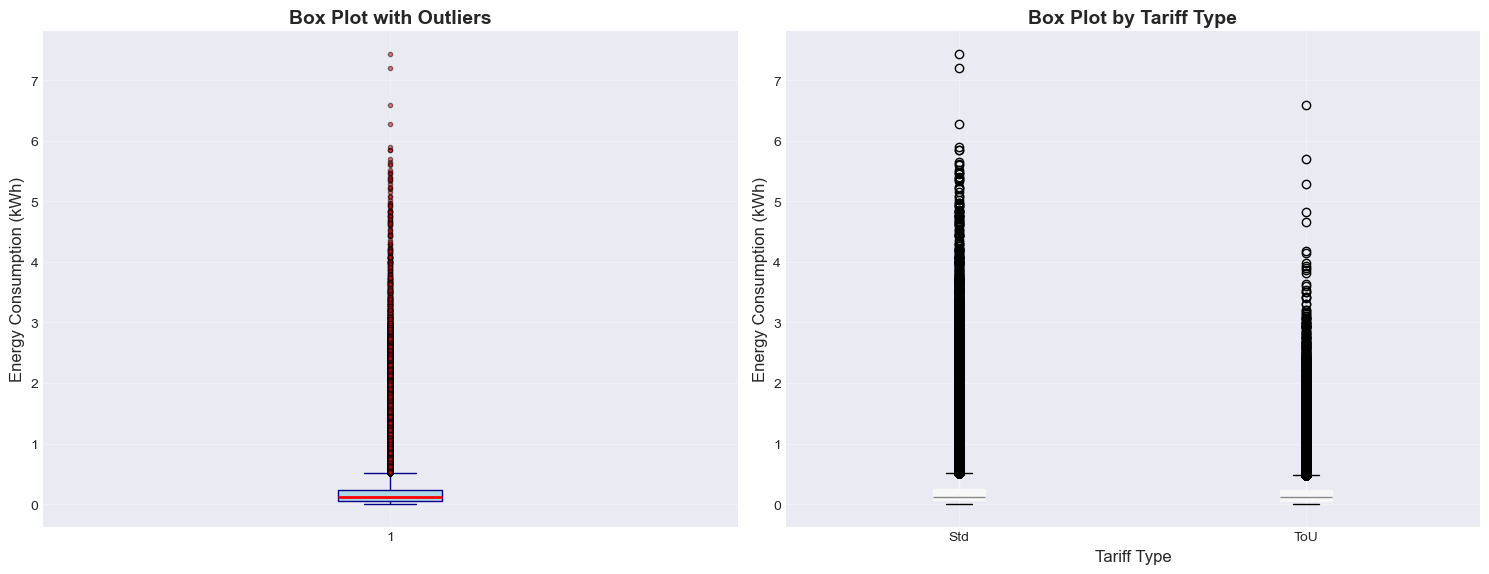

In [154]:
# Box plot to visualize outliers
print("\n📊 BOX PLOT VISUALIZATION")
print("="*70)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box plot with outliers
axes[0].boxplot(df_cleaned['energy_kwh'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='darkblue'),
                whiskerprops=dict(color='darkblue'),
                capprops=dict(color='darkblue'),
                medianprops=dict(color='red', linewidth=2),
                flierprops=dict(marker='o', markerfacecolor='red', markersize=3, alpha=0.5))
axes[0].set_ylabel('Energy Consumption (kWh)', fontsize=12)
axes[0].set_title('Box Plot with Outliers', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Box plot by tariff type
df_cleaned.boxplot(column='energy_kwh', by='tariff_type', ax=axes[1], patch_artist=True)
axes[1].set_xlabel('Tariff Type', fontsize=12)
axes[1].set_ylabel('Energy Consumption (kWh)', fontsize=12)
axes[1].set_title('Box Plot by Tariff Type', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
plt.suptitle('')

plt.tight_layout()
plt.show()

### 5.4 Visualize Outliers - Histogram and Distribution


📊 DISTRIBUTION VISUALIZATION


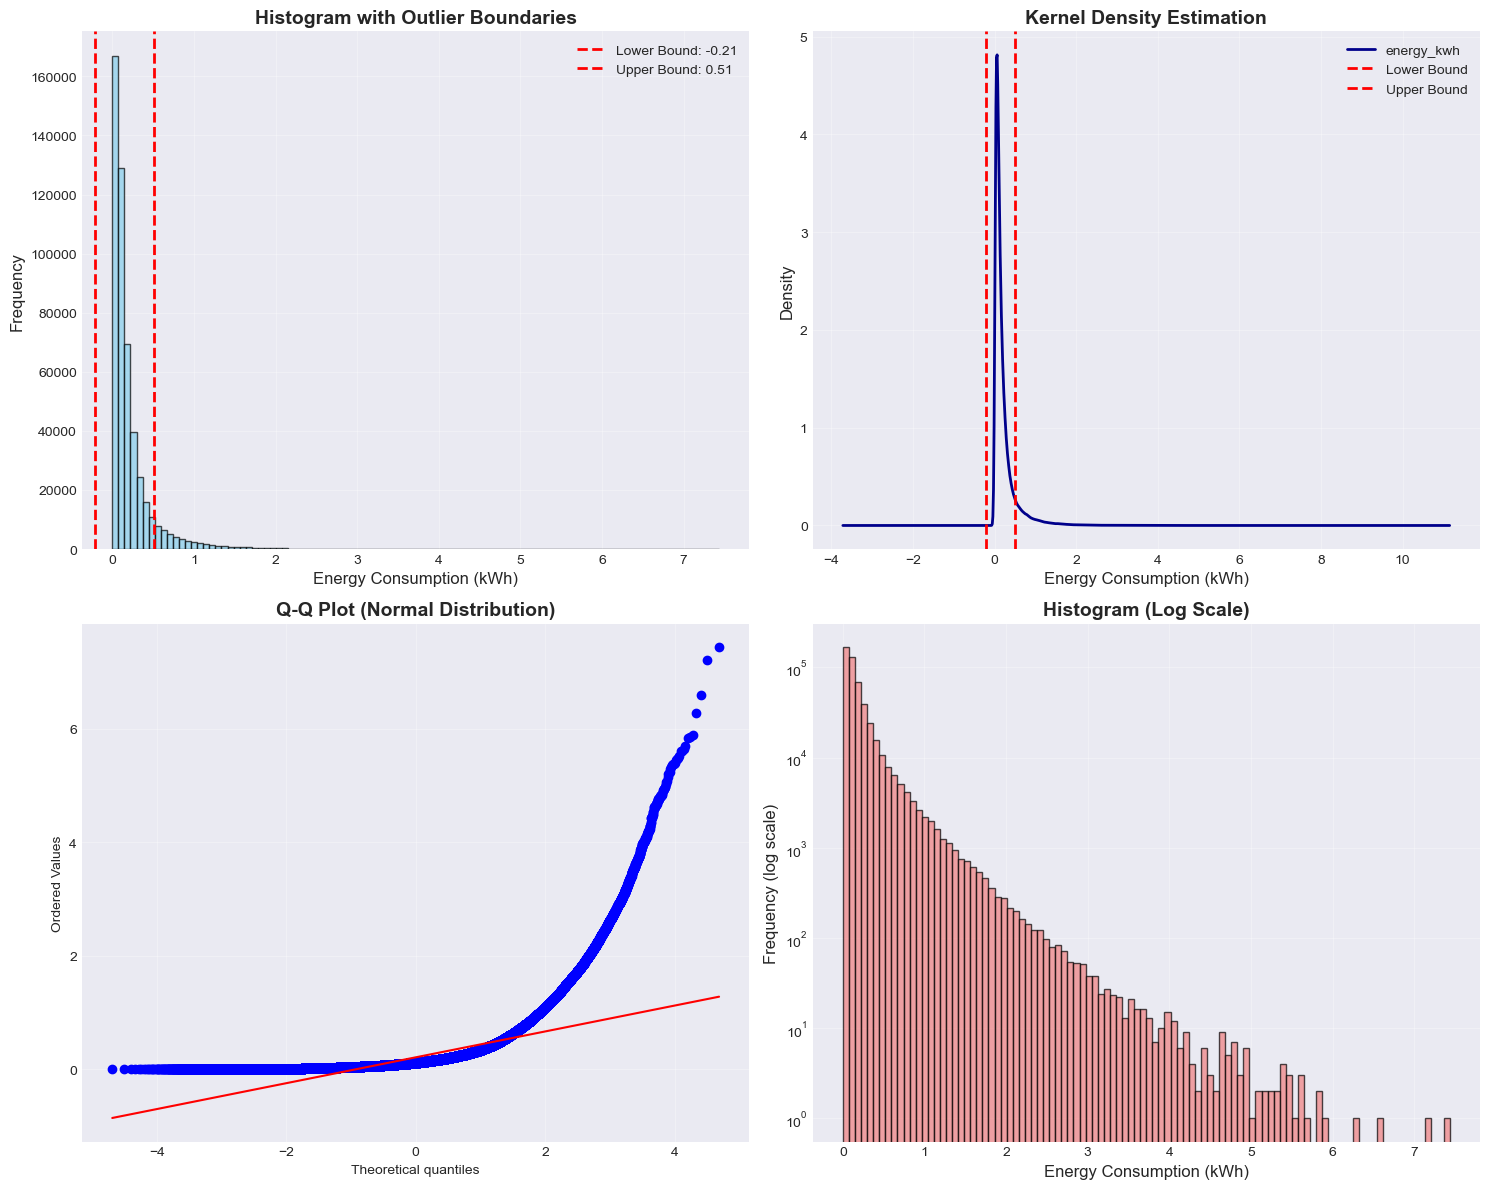

In [157]:
# Distribution visualization
print("\n📊 DISTRIBUTION VISUALIZATION")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogram
axes[0, 0].hist(df_cleaned['energy_kwh'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(lower_bound, color='red', linestyle='--', linewidth=2, label=f'Lower Bound: {lower_bound:.2f}')
axes[0, 0].axvline(upper_bound, color='red', linestyle='--', linewidth=2, label=f'Upper Bound: {upper_bound:.2f}')
axes[0, 0].set_xlabel('Energy Consumption (kWh)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Histogram with Outlier Boundaries', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# KDE Plot
df_cleaned['energy_kwh'].plot(kind='kde', ax=axes[0, 1], color='darkblue', linewidth=2)
axes[0, 1].axvline(lower_bound, color='red', linestyle='--', linewidth=2, label=f'Lower Bound')
axes[0, 1].axvline(upper_bound, color='red', linestyle='--', linewidth=2, label=f'Upper Bound')
axes[0, 1].set_xlabel('Energy Consumption (kWh)', fontsize=12)
axes[0, 1].set_ylabel('Density', fontsize=12)
axes[0, 1].set_title('Kernel Density Estimation', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Q-Q Plot
stats.probplot(df_cleaned['energy_kwh'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Normal Distribution)', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Log-scale histogram
axes[1, 1].hist(df_cleaned['energy_kwh'], bins=100, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Energy Consumption (kWh)', fontsize=12)
axes[1, 1].set_ylabel('Frequency (log scale)', fontsize=12)
axes[1, 1].set_yscale('log')
axes[1, 1].set_title('Histogram (Log Scale)', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 5.5 Outlier Treatment Decision

For energy poverty detection, we need to consider:
1. **Zero or very low consumption** may indicate disconnections or financial hardship (energy poverty)
2. **Very high consumption** may indicate affluent households or data quality issues
3. **Context matters** - we'll examine outliers rather than automatically remove them

In [160]:
# Analyze zero and near-zero consumption (potential energy poverty indicators)
print("\n🔍 ANALYZING ZERO AND LOW CONSUMPTION PATTERNS")
print("="*70)

zero_consumption = df_cleaned[df_cleaned['energy_kwh'] == 0]
low_consumption = df_cleaned[(df_cleaned['energy_kwh'] > 0) & (df_cleaned['energy_kwh'] < 0.01)]

print(f"Zero consumption records: {len(zero_consumption):,} ({(len(zero_consumption)/len(df_cleaned))*100:.2f}%)")
print(f"Very low consumption (<0.01 kWh): {len(low_consumption):,} ({(len(low_consumption)/len(df_cleaned))*100:.2f}%)")

# Analyze high consumption
print("\n🔍 ANALYZING HIGH CONSUMPTION PATTERNS")
print("="*70)

high_consumption_99 = df_cleaned['energy_kwh'].quantile(0.99)
high_consumption_999 = df_cleaned['energy_kwh'].quantile(0.999)

print(f"99th percentile: {high_consumption_99:.4f} kWh")
print(f"99.9th percentile: {high_consumption_999:.4f} kWh")
print(f"Maximum value: {df_cleaned['energy_kwh'].max():.4f} kWh")

extreme_high = df_cleaned[df_cleaned['energy_kwh'] > high_consumption_999]
print(f"\nRecords above 99.9th percentile: {len(extreme_high):,} ({(len(extreme_high)/len(df_cleaned))*100:.2f}%)")


🔍 ANALYZING ZERO AND LOW CONSUMPTION PATTERNS
Zero consumption records: 6,011 (1.20%)
Very low consumption (<0.01 kWh): 6,729 (1.35%)

🔍 ANALYZING HIGH CONSUMPTION PATTERNS
99th percentile: 1.4950 kWh
99.9th percentile: 2.8080 kWh
Maximum value: 7.4340 kWh

Records above 99.9th percentile: 499 (0.10%)


In [162]:
# Create dataset with different outlier treatment strategies
print("\n🔧 OUTLIER TREATMENT STRATEGIES")
print("="*70)

# Strategy 1: Keep all data (for energy poverty analysis, zeros are meaningful)
df_strategy1 = df_cleaned.copy()

# Strategy 2: Remove only extreme high outliers (> 99.9th percentile)
# These might be data errors
df_strategy2 = df_cleaned[df_cleaned['energy_kwh'] <= high_consumption_999].copy()

# Strategy 3: Remove IQR-based outliers (traditional approach)
df_strategy3 = df_cleaned[(df_cleaned['energy_kwh'] >= lower_bound) & 
                           (df_cleaned['energy_kwh'] <= upper_bound)].copy()

# Strategy 4: Cap outliers at boundaries (winsorization)
df_strategy4 = df_cleaned.copy()
df_strategy4.loc[df_strategy4['energy_kwh'] < lower_bound, 'energy_kwh'] = lower_bound
df_strategy4.loc[df_strategy4['energy_kwh'] > upper_bound, 'energy_kwh'] = upper_bound

print("\nStrategy Comparison:")
print(f"Strategy 1 (Keep All): {len(df_strategy1):,} records")
print(f"Strategy 2 (Remove >99.9%): {len(df_strategy2):,} records (removed {len(df_strategy1) - len(df_strategy2):,})")
print(f"Strategy 3 (IQR Method): {len(df_strategy3):,} records (removed {len(df_strategy1) - len(df_strategy3):,})")
print(f"Strategy 4 (Winsorization): {len(df_strategy4):,} records (capped outliers)")

print("\n💡 RECOMMENDATION FOR ENERGY POVERTY DETECTION:")
print("Strategy 2 is recommended - removing only extreme high outliers (>99.9%)")
print("This preserves zero/low consumption patterns (energy poverty indicators)")
print("while removing potentially erroneous extreme values.")

# Use Strategy 2 as final cleaned dataset
df_final = df_strategy2.copy()
print(f"\n✓ Final dataset selected: {len(df_final):,} records")


🔧 OUTLIER TREATMENT STRATEGIES

Strategy Comparison:
Strategy 1 (Keep All): 499,981 records
Strategy 2 (Remove >99.9%): 499,482 records (removed 499)
Strategy 3 (IQR Method): 454,323 records (removed 45,658)
Strategy 4 (Winsorization): 499,981 records (capped outliers)

💡 RECOMMENDATION FOR ENERGY POVERTY DETECTION:
Strategy 2 is recommended - removing only extreme high outliers (>99.9%)
This preserves zero/low consumption patterns (energy poverty indicators)
while removing potentially erroneous extreme values.

✓ Final dataset selected: 499,482 records


### 5.6 Statistical Summary After Outlier Treatment

In [165]:
# Descriptive statistics after outlier treatment
print("\n📊 DESCRIPTIVE STATISTICS - AFTER OUTLIER TREATMENT")
print("="*70)
print(df_final['energy_kwh'].describe())

# Additional statistics
print("\nAdditional Statistics:")
print(f"Skewness: {df_final['energy_kwh'].skew():.4f}")
print(f"Kurtosis: {df_final['energy_kwh'].kurtosis():.4f}")
print(f"Variance: {df_final['energy_kwh'].var():.4f}")
print(f"Coefficient of Variation: {(df_final['energy_kwh'].std()/df_final['energy_kwh'].mean())*100:.2f}%")

# Comparison before and after
print("\n📊 COMPARISON: BEFORE vs AFTER OUTLIER TREATMENT")
print("="*70)

comparison = pd.DataFrame({
    'Metric': ['Count', 'Mean', 'Std Dev', 'Min', '25%', '50%', '75%', 'Max', 'Skewness', 'Kurtosis'],
    'Before': [
        f"{len(df_cleaned):,}",
        f"{df_cleaned['energy_kwh'].mean():.4f}",
        f"{df_cleaned['energy_kwh'].std():.4f}",
        f"{df_cleaned['energy_kwh'].min():.4f}",
        f"{df_cleaned['energy_kwh'].quantile(0.25):.4f}",
        f"{df_cleaned['energy_kwh'].median():.4f}",
        f"{df_cleaned['energy_kwh'].quantile(0.75):.4f}",
        f"{df_cleaned['energy_kwh'].max():.4f}",
        f"{df_cleaned['energy_kwh'].skew():.4f}",
        f"{df_cleaned['energy_kwh'].kurtosis():.4f}"
    ],
    'After': [
        f"{len(df_final):,}",
        f"{df_final['energy_kwh'].mean():.4f}",
        f"{df_final['energy_kwh'].std():.4f}",
        f"{df_final['energy_kwh'].min():.4f}",
        f"{df_final['energy_kwh'].quantile(0.25):.4f}",
        f"{df_final['energy_kwh'].median():.4f}",
        f"{df_final['energy_kwh'].quantile(0.75):.4f}",
        f"{df_final['energy_kwh'].max():.4f}",
        f"{df_final['energy_kwh'].skew():.4f}",
        f"{df_final['energy_kwh'].kurtosis():.4f}"
    ]
})

display(comparison)


📊 DESCRIPTIVE STATISTICS - AFTER OUTLIER TREATMENT
count   499482.0000
mean         0.2080
std          0.2765
min          0.0000
25%          0.0580
50%          0.1160
75%          0.2380
max          2.8080
Name: energy_kwh, dtype: float64

Additional Statistics:
Skewness: 3.4997
Kurtosis: 16.6752
Variance: 0.0765
Coefficient of Variation: 132.94%

📊 COMPARISON: BEFORE vs AFTER OUTLIER TREATMENT


,Metric,Before,After
0,Count,"499,981","499,482"
1,Mean,0.2114,0.2080
2,Std Dev,0.2968,0.2765
3,Min,0.0000,0.0000
4,25%,0.0580,0.0580
5,50%,0.1160,0.1160
6,75%,0.2390,0.2380
7,Max,7.4340,2.8080
8,Skewness,4.4620,3.4997
9,Kurtosis,33.9896,16.6752


## 6. Exploratory Data Analysis (EDA)
### 6.1 Basic Dataset Overview

In [168]:
# Final dataset overview
print("\n📊 FINAL CLEANED DATASET OVERVIEW")
print("="*70)
print(f"Total Records: {len(df_final):,}")
print(f"Total Households: {df_final['household_id'].nunique():,}")
print(f"Date Range: {df_final['timestamp'].min().strftime('%Y-%m-%d')} to {df_final['timestamp'].max().strftime('%Y-%m-%d')}")
print(f"Total Days: {(df_final['timestamp'].max() - df_final['timestamp'].min()).days} days")
print(f"\nColumns: {', '.join(df_final.columns.tolist())}")
print(f"\nMemory Usage: {df_final.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


📊 FINAL CLEANED DATASET OVERVIEW
Total Records: 499,482
Total Households: 5,560
Date Range: 2011-11-23 to 2014-02-28
Total Days: 827 days

Columns: household_id, tariff_type, timestamp, energy_kwh

Memory Usage: 13.30 MB


### 6.2 Tariff Type Analysis


📊 TARIFF TYPE DISTRIBUTION


,Tariff Type,Count,Percentage
0,Std,398930,79.8687
1,ToU,100552,20.1313


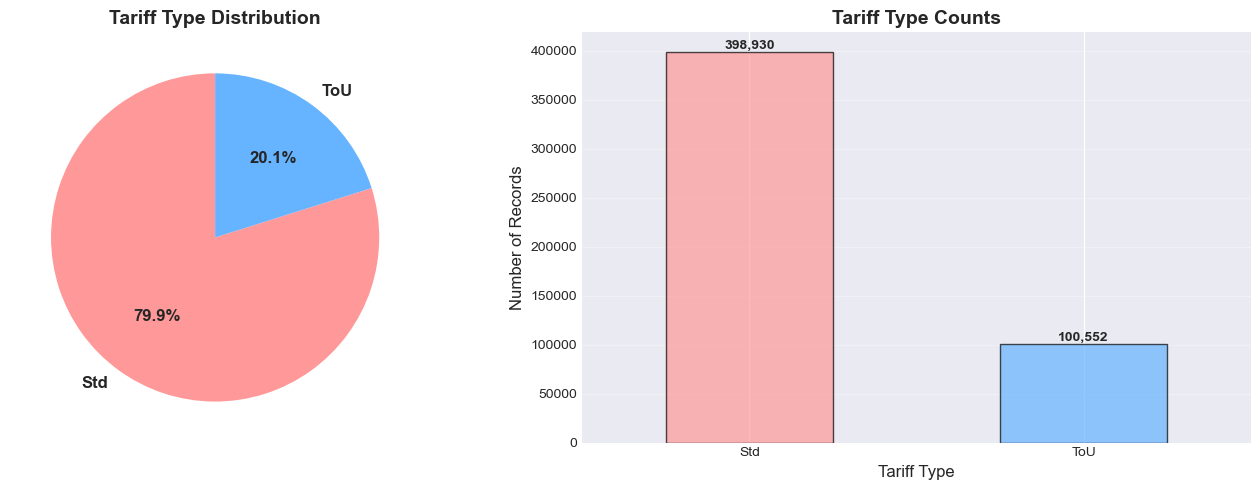

In [171]:
# Tariff type distribution
print("\n📊 TARIFF TYPE DISTRIBUTION")
print("="*70)

tariff_counts = df_final['tariff_type'].value_counts()
tariff_pct = df_final['tariff_type'].value_counts(normalize=True) * 100

tariff_summary = pd.DataFrame({
    'Tariff Type': tariff_counts.index,
    'Count': tariff_counts.values,
    'Percentage': tariff_pct.values
})

display(tariff_summary)

# Visualize tariff distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
colors = ['#ff9999', '#66b3ff']
axes[0].pie(tariff_counts.values, labels=tariff_counts.index, autopct='%1.1f%%',
            startangle=90, colors=colors, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[0].set_title('Tariff Type Distribution', fontsize=14, fontweight='bold')

# Bar chart
tariff_counts.plot(kind='bar', ax=axes[1], color=colors, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Tariff Type', fontsize=12)
axes[1].set_ylabel('Number of Records', fontsize=12)
axes[1].set_title('Tariff Type Counts', fontsize=14, fontweight='bold')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, v in enumerate(tariff_counts.values):
    axes[1].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [173]:
# Energy consumption by tariff type
print("\n📊 ENERGY CONSUMPTION BY TARIFF TYPE")
print("="*70)

tariff_stats = df_final.groupby('tariff_type')['energy_kwh'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Std Dev', 'std'),
    ('Min', 'min'),
    ('Max', 'max'),
    ('Total', 'sum')
]).round(4)

display(tariff_stats)


📊 ENERGY CONSUMPTION BY TARIFF TYPE


,Count,Mean,Median,Std Dev,Min,Max,Total
tariff_type,,,,,,,
Std,398930,0.2110,0.1180,0.2814,0.0000,2.8080,84181.1940
ToU,100552,0.1962,0.1120,0.2562,0.0000,2.8080,19727.3840


### 6.3 Household Analysis

In [176]:
# Household-level statistics
print("\n📊 HOUSEHOLD-LEVEL STATISTICS")
print("="*70)

household_stats = df_final.groupby('household_id')['energy_kwh'].agg([
    ('Record_Count', 'count'),
    ('Mean_Consumption', 'mean'),
    ('Median_Consumption', 'median'),
    ('Std_Dev', 'std'),
    ('Total_Consumption', 'sum'),
    ('Min_Consumption', 'min'),
    ('Max_Consumption', 'max')
]).round(4)

print(f"Total Unique Households: {len(household_stats):,}")
print(f"\nAverage records per household: {household_stats['Record_Count'].mean():.2f}")
print(f"Median records per household: {household_stats['Record_Count'].median():.0f}")
print(f"\nSample of household statistics:")
display(household_stats.head(20))


📊 HOUSEHOLD-LEVEL STATISTICS
Total Unique Households: 5,565

Average records per household: 89.75
Median records per household: 93

Sample of household statistics:


,Record_Count,Mean_Consumption,Median_Consumption,Std_Dev,Total_Consumption,Min_Consumption,Max_Consumption
household_id,,,,,,,
MAC000002,72,0.2760,0.1785,0.2212,19.8700,0.0760,1.2030
MAC000003,104,0.2846,0.1470,0.3975,29.6030,0.0070,2.6670
MAC000004,95,0.0332,0.0000,0.0667,3.1500,0.0000,0.2100
MAC000005,91,0.1005,0.0380,0.1310,9.1460,0.0270,0.7350
MAC000006,109,0.0773,0.0580,0.0771,8.4260,0.0000,0.5640
MAC000007,74,0.1755,0.1065,0.1913,12.9890,0.0180,0.9100
MAC000008,78,0.3433,0.3125,0.1830,26.7800,0.0790,0.8810
MAC000009,75,0.1765,0.1370,0.1440,13.2340,0.0350,0.7130
MAC000010,75,0.4910,0.4110,0.3320,36.8250,0.1360,1.6550



📊 DISTRIBUTION OF RECORDS PER HOUSEHOLD


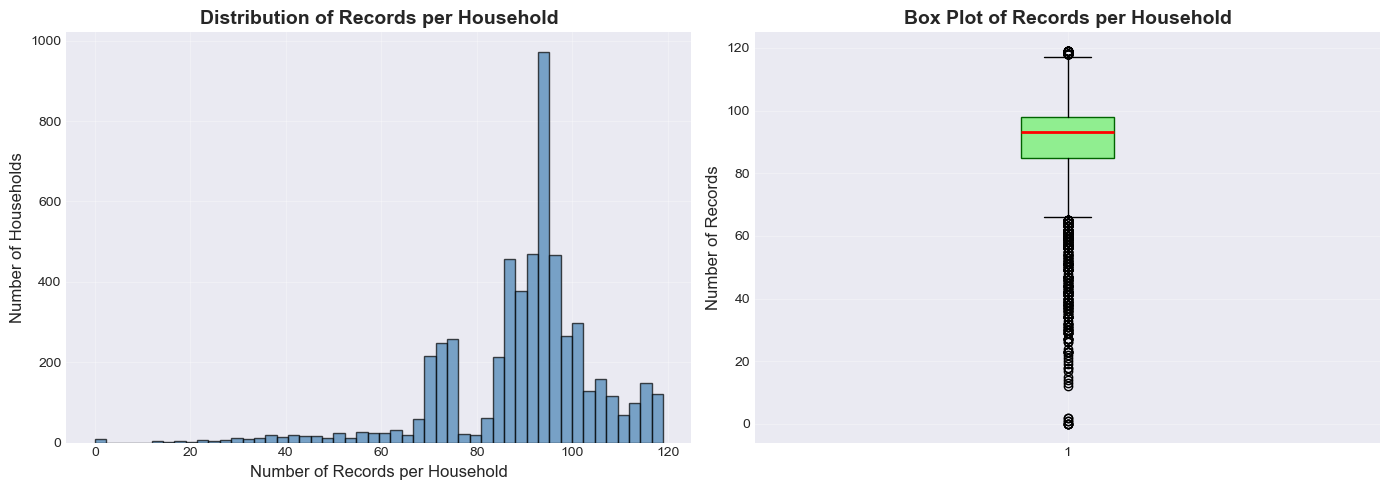


Records per household - Statistics:
count   5565.0000
mean      89.7542
std       15.9802
min        0.0000
25%       85.0000
50%       93.0000
75%       98.0000
max      119.0000
Name: Record_Count, dtype: float64


In [178]:
# Distribution of records per household
print("\n📊 DISTRIBUTION OF RECORDS PER HOUSEHOLD")
print("="*70)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(household_stats['Record_Count'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Number of Records per Household', fontsize=12)
axes[0].set_ylabel('Number of Households', fontsize=12)
axes[0].set_title('Distribution of Records per Household', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(household_stats['Record_Count'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightgreen', color='darkgreen'),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('Number of Records', fontsize=12)
axes[1].set_title('Box Plot of Records per Household', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nRecords per household - Statistics:")
print(household_stats['Record_Count'].describe())


📊 TOP 20 HOUSEHOLDS BY TOTAL CONSUMPTION


,Record_Count,Mean_Consumption,Median_Consumption,Std_Dev,Total_Consumption,Min_Consumption,Max_Consumption
household_id,,,,,,,
MAC004179,82,1.8465,1.7550,0.4106,151.4160,0.8410,2.7780
MAC000557,98,1.3564,1.3880,0.3355,132.9270,0.5040,2.0620
MAC001315,90,1.2206,0.8005,0.8196,109.8570,0.2670,2.7490
MAC000105,113,0.9678,0.7190,0.6524,109.3650,0.1710,2.7080
MAC001739,91,1.1899,1.1940,0.5553,108.2840,0.3080,2.3960
MAC004593,80,1.3375,1.1320,0.6249,106.9990,0.1260,2.4840
MAC003329,74,1.4344,1.3360,0.6879,106.1440,0.3960,2.7290
MAC000985,87,1.1528,0.9930,0.5939,100.2930,0.5010,2.7020
MAC002213,85,1.1501,0.9160,0.6975,97.7620,0.2510,2.6680


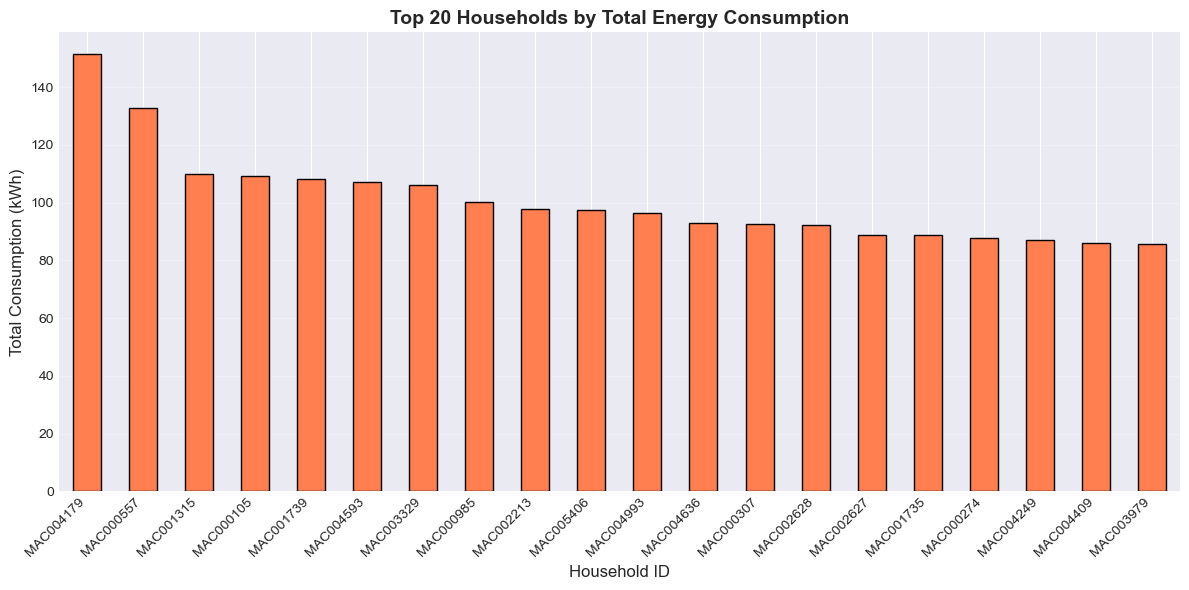

In [180]:
# Top 20 households by consumption
print("\n📊 TOP 20 HOUSEHOLDS BY TOTAL CONSUMPTION")
print("="*70)

top_20_households = household_stats.nlargest(20, 'Total_Consumption')
display(top_20_households)

# Visualize top 20
fig, ax = plt.subplots(figsize=(12, 6))
top_20_households['Total_Consumption'].plot(kind='bar', ax=ax, color='coral', edgecolor='black')
ax.set_xlabel('Household ID', fontsize=12)
ax.set_ylabel('Total Consumption (kWh)', fontsize=12)
ax.set_title('Top 20 Households by Total Energy Consumption', fontsize=14, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


📊 BOTTOM 20 HOUSEHOLDS BY MEAN CONSUMPTION (Potential Energy Poverty)


,Record_Count,Mean_Consumption,Median_Consumption,Std_Dev,Total_Consumption,Min_Consumption,Max_Consumption
household_id,,,,,,,
MAC000037,117,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
MAC002110,1,0.0000,0.0000,NaN,0.0000,0.0000,0.0000
MAC002594,86,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
MAC004067,93,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
MAC000197,117,0.0001,0.0000,0.0008,0.0090,0.0000,0.0090
MAC001309,94,0.0007,0.0000,0.0037,0.0640,0.0000,0.0270
MAC004672,84,0.0045,0.0000,0.0163,0.3750,0.0000,0.0810
MAC002388,96,0.0060,0.0050,0.0035,0.5730,0.0000,0.0110
MAC005069,92,0.0061,0.0000,0.0140,0.5650,0.0000,0.0900


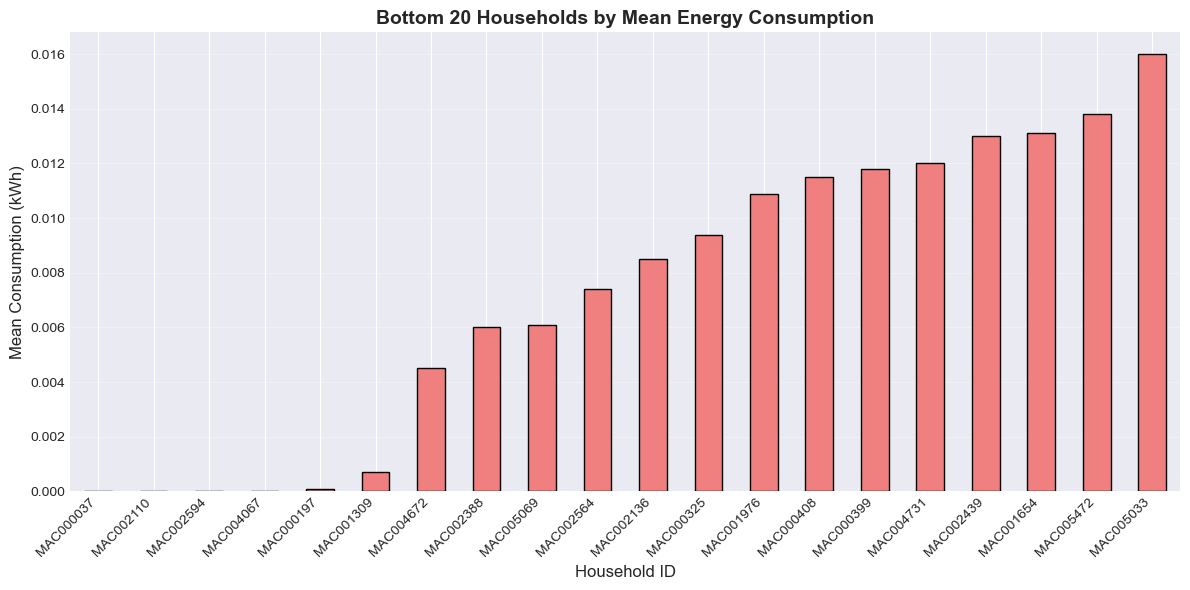

In [182]:
# Bottom 20 households by consumption (potential energy poverty)
print("\n📊 BOTTOM 20 HOUSEHOLDS BY MEAN CONSUMPTION (Potential Energy Poverty)")
print("="*70)

bottom_20_households = household_stats.nsmallest(20, 'Mean_Consumption')
display(bottom_20_households)

# Visualize bottom 20
fig, ax = plt.subplots(figsize=(12, 6))
bottom_20_households['Mean_Consumption'].plot(kind='bar', ax=ax, color='lightcoral', edgecolor='black')
ax.set_xlabel('Household ID', fontsize=12)
ax.set_ylabel('Mean Consumption (kWh)', fontsize=12)
ax.set_title('Bottom 20 Households by Mean Energy Consumption', fontsize=14, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

### 6.4 Temporal Analysis

In [185]:
# Extract temporal features
print("\n🔧 EXTRACTING TEMPORAL FEATURES")
print("="*70)

df_final['year'] = df_final['timestamp'].dt.year
df_final['month'] = df_final['timestamp'].dt.month
df_final['day'] = df_final['timestamp'].dt.day
df_final['hour'] = df_final['timestamp'].dt.hour
df_final['dayofweek'] = df_final['timestamp'].dt.dayofweek
df_final['quarter'] = df_final['timestamp'].dt.quarter
df_final['is_weekend'] = df_final['dayofweek'].isin([5, 6]).astype(int)

# Map day names
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
             4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_final['day_name'] = df_final['dayofweek'].map(day_names)

# Map month names
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df_final['month_name'] = df_final['month'].map(month_names)

print("✓ Temporal features extracted successfully")
print(f"\nNew features added: year, month, day, hour, dayofweek, quarter, is_weekend, day_name, month_name")


🔧 EXTRACTING TEMPORAL FEATURES
✓ Temporal features extracted successfully

New features added: year, month, day, hour, dayofweek, quarter, is_weekend, day_name, month_name



📊 YEARLY DISTRIBUTION


,Count,Mean,Median,Total
year,,,,
2011,1272,0.2557,0.1385,325.2550
2012,178518,0.2026,0.1150,36172.7460
2013,279350,0.2077,0.1160,58019.1330
2014,40342,0.2328,0.1280,9391.4440


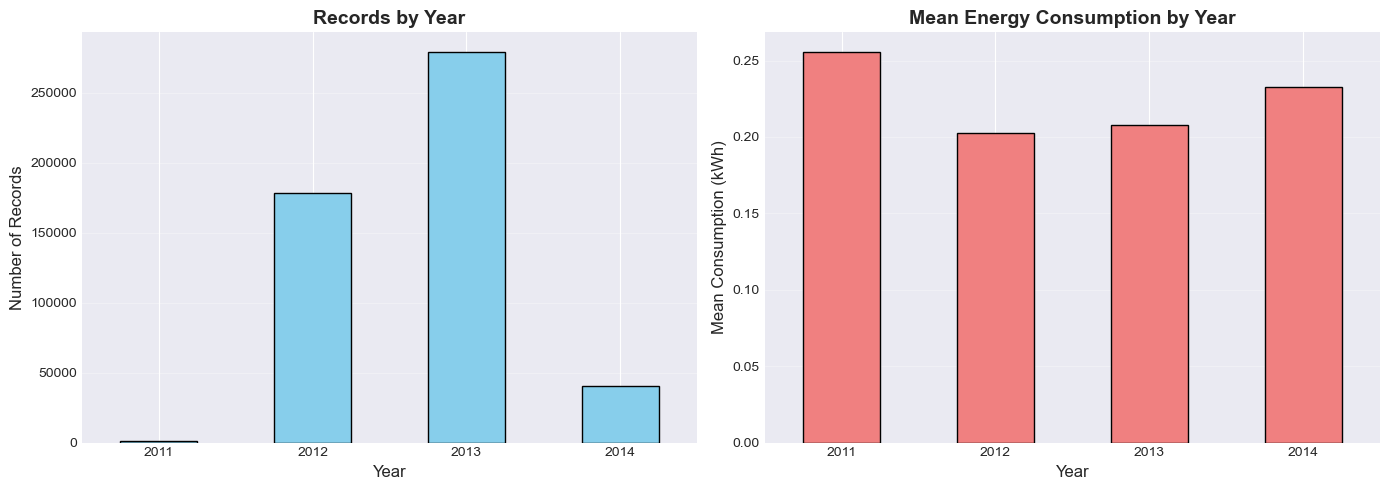

In [187]:
# Yearly distribution
print("\n📊 YEARLY DISTRIBUTION")
print("="*70)

yearly_stats = df_final.groupby('year')['energy_kwh'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Total', 'sum')
]).round(4)

display(yearly_stats)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

yearly_stats['Count'].plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Number of Records', fontsize=12)
axes[0].set_title('Records by Year', fontsize=14, fontweight='bold')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].grid(True, alpha=0.3, axis='y')

yearly_stats['Mean'].plot(kind='bar', ax=axes[1], color='lightcoral', edgecolor='black')
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Mean Consumption (kWh)', fontsize=12)
axes[1].set_title('Mean Energy Consumption by Year', fontsize=14, fontweight='bold')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


📊 MONTHLY CONSUMPTION PATTERNS


,Count,Mean,Median,Std_Dev
month,,,,
Jan,48649,0.2479,0.1350,0.3242
Feb,43697,0.2424,0.1300,0.3246
Mar,29325,0.2394,0.1270,0.3220
Apr,30042,0.2089,0.1150,0.2786
May,35214,0.1828,0.1070,0.2383
Jun,38749,0.1741,0.1040,0.2248
Jul,43627,0.1686,0.1060,0.2062
Aug,44552,0.1654,0.1040,0.2021
Sep,43490,0.1823,0.1060,0.2378


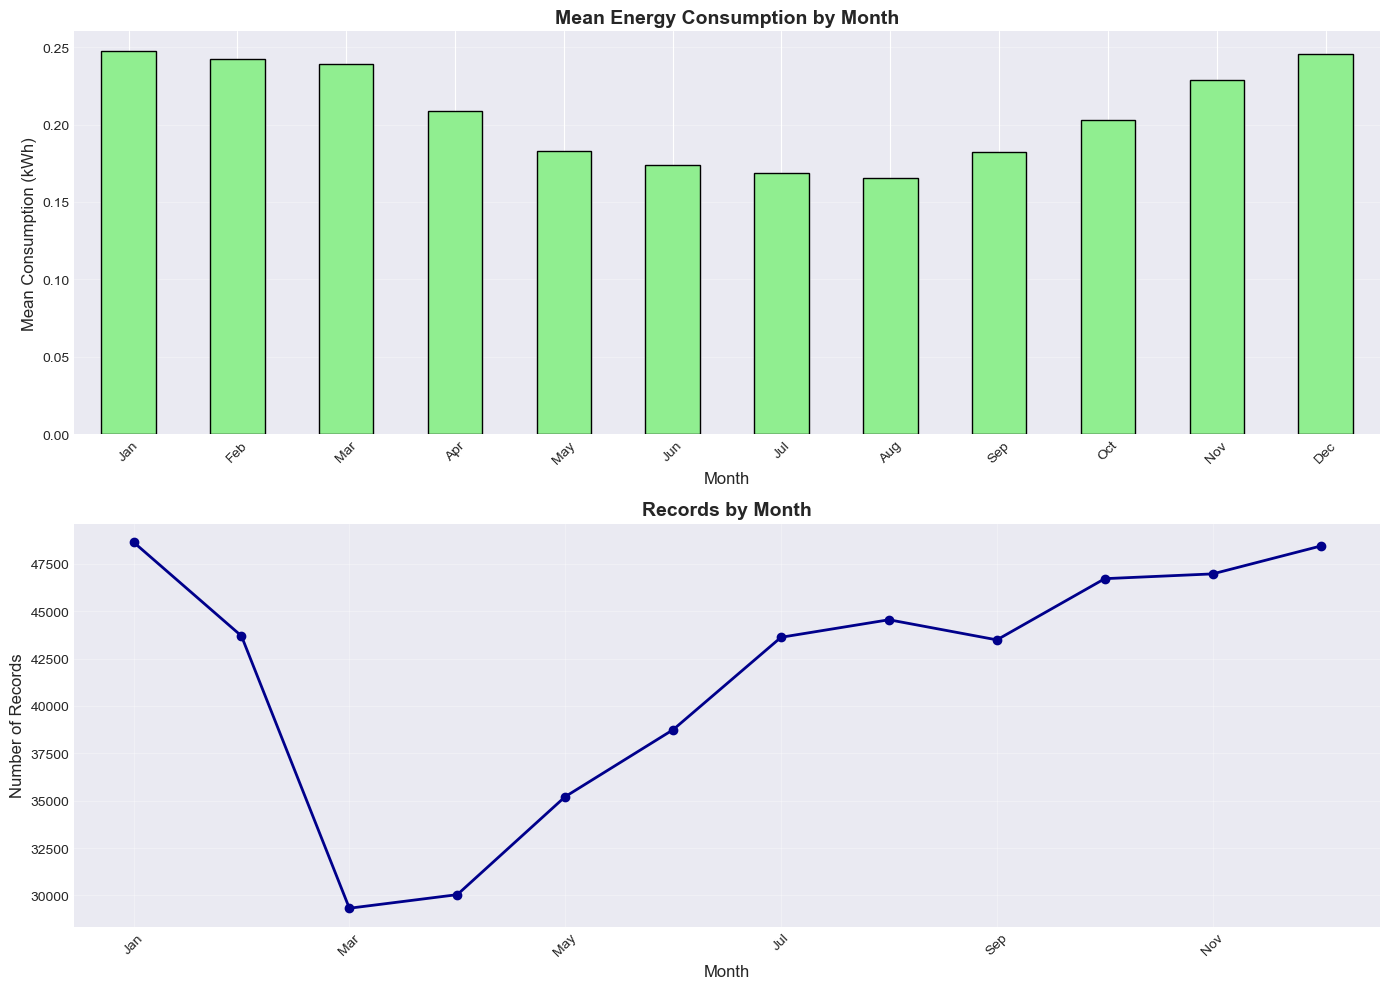

In [221]:
# Monthly patterns
print("\n📊 MONTHLY CONSUMPTION PATTERNS")
print("="*70)

monthly_stats = df_final.groupby('month')['energy_kwh'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Std_Dev', 'std')
]).round(4)

# FIX: Only map the months that exist in your data
month_names_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
monthly_stats.index = monthly_stats.index.map(month_names_dict)

display(monthly_stats)

# Visualize
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Mean consumption by month
monthly_stats['Mean'].plot(kind='bar', ax=axes[0], color='lightgreen', edgecolor='black')
axes[0].set_xlabel('Month', fontsize=12)
axes[0].set_ylabel('Mean Consumption (kWh)', fontsize=12)
axes[0].set_title('Mean Energy Consumption by Month', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# Records by month
monthly_stats['Count'].plot(kind='line', ax=axes[1], color='darkblue', linewidth=2, marker='o')
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Number of Records', fontsize=12)
axes[1].set_title('Records by Month', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


📊 HOURLY CONSUMPTION PATTERNS (24-Hour Cycle)


,Count,Mean,Median
hour,,,
0,21518,0.1666,0.0930
1,20871,0.1337,0.0790
2,20996,0.1216,0.0730
3,21242,0.1098,0.0700
4,21379,0.1132,0.0700
5,20885,0.1241,0.0740
6,21116,0.1568,0.0890
7,20743,0.1948,0.1110
8,21117,0.2050,0.1210


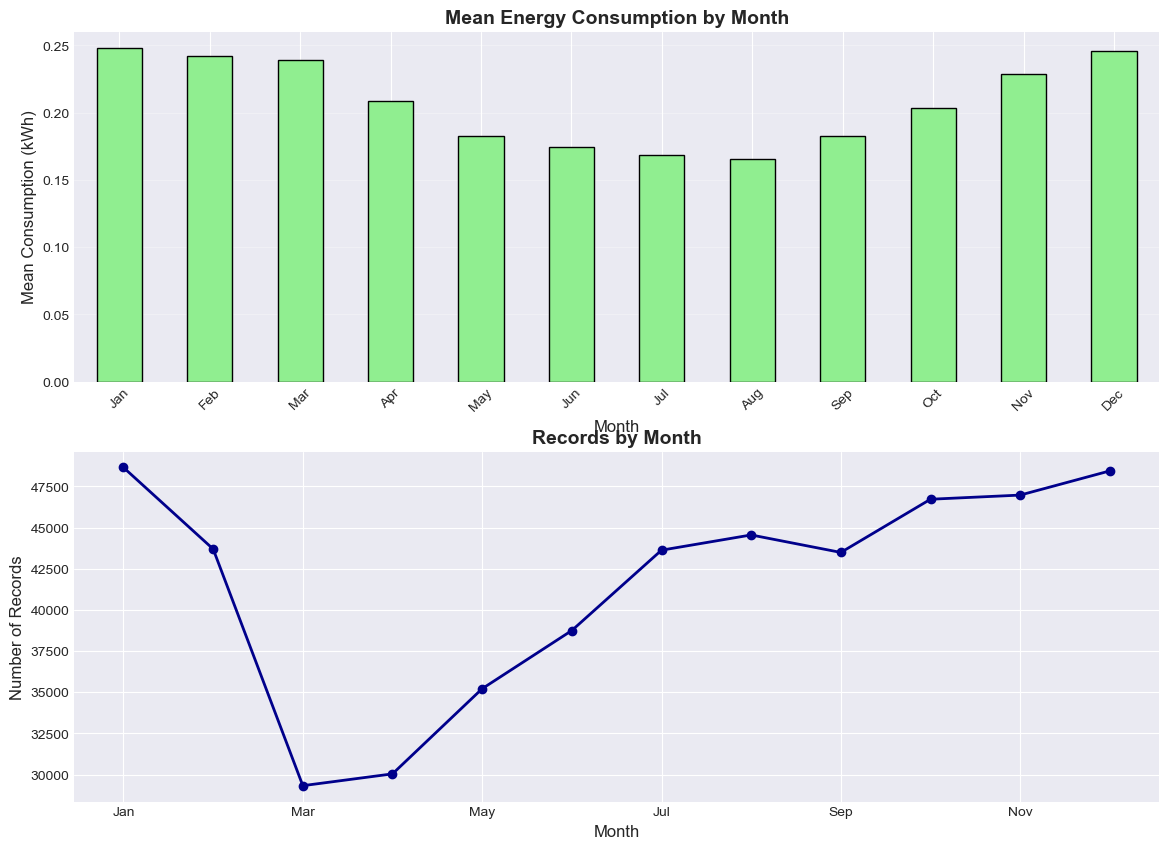

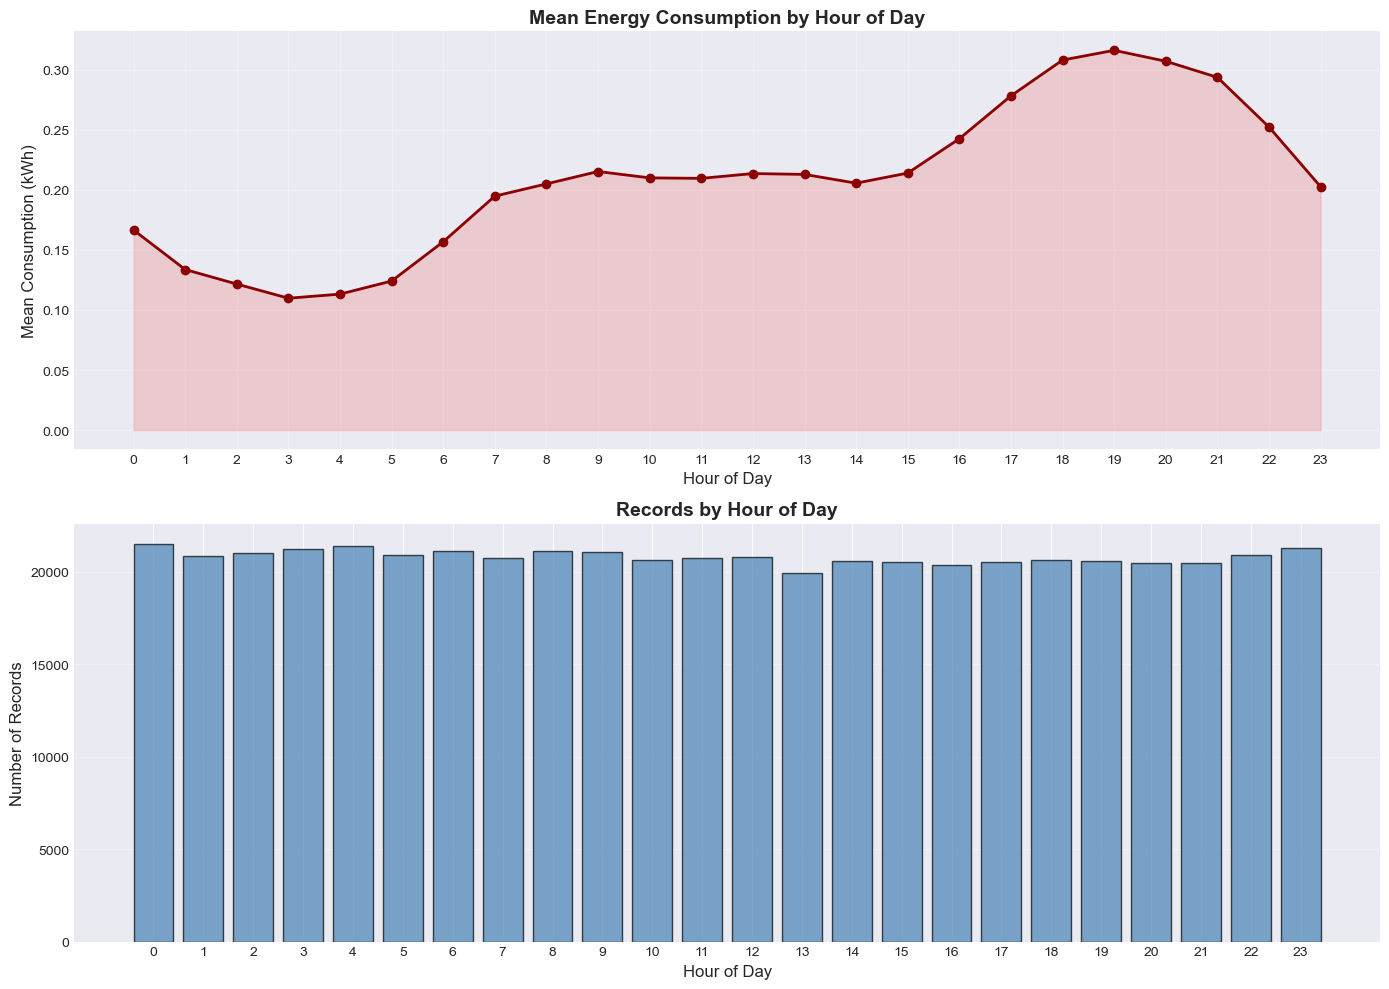

In [191]:
# Hourly patterns
print("\n📊 HOURLY CONSUMPTION PATTERNS (24-Hour Cycle)")
print("="*70)

hourly_stats = df_final.groupby('hour')['energy_kwh'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Median', 'median')
]).round(4)

display(hourly_stats)

# Visualize
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

axes[0].plot(hourly_stats.index, hourly_stats['Mean'], color='darkred', linewidth=2, marker='o')
axes[0].fill_between(hourly_stats.index, hourly_stats['Mean'], alpha=0.3, color='lightcoral')
axes[0].set_xlabel('Hour of Day', fontsize=12)
axes[0].set_ylabel('Mean Consumption (kWh)', fontsize=12)
axes[0].set_title('Mean Energy Consumption by Hour of Day', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(0, 24))
axes[0].grid(True, alpha=0.3)

axes[1].bar(hourly_stats.index, hourly_stats['Count'], color='steelblue', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Hour of Day', fontsize=12)
axes[1].set_ylabel('Number of Records', fontsize=12)
axes[1].set_title('Records by Hour of Day', fontsize=14, fontweight='bold')
axes[1].set_xticks(range(0, 24))
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


📊 DAY OF WEEK CONSUMPTION PATTERNS


,Count,Mean,Median
day_name,,,
Monday,71976,0.2061,0.1150
Tuesday,71130,0.2063,0.1160
Wednesday,71368,0.2049,0.1150
Thursday,71998,0.2049,0.1150
Friday,70275,0.2036,0.1140
Saturday,70927,0.2111,0.1190
Sunday,71808,0.2193,0.1210


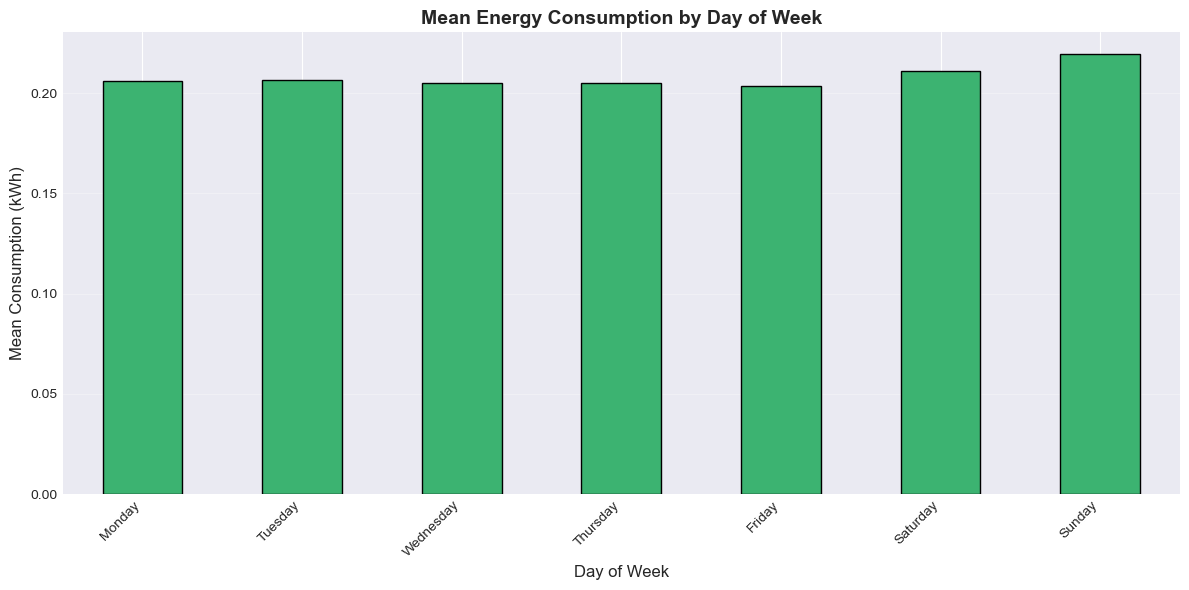

In [193]:
# Day of week patterns
print("\n📊 DAY OF WEEK CONSUMPTION PATTERNS")
print("="*70)

dow_stats = df_final.groupby('day_name')['energy_kwh'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Median', 'median')
]).round(4)

# Reorder by day of week
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_stats = dow_stats.reindex(dow_order)

display(dow_stats)

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))
dow_stats['Mean'].plot(kind='bar', ax=ax, color='mediumseagreen', edgecolor='black')
ax.set_xlabel('Day of Week', fontsize=12)
ax.set_ylabel('Mean Consumption (kWh)', fontsize=12)
ax.set_title('Mean Energy Consumption by Day of Week', fontsize=14, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [195]:
# Weekend vs Weekday analysis
print("\n📊 WEEKEND vs WEEKDAY COMPARISON")
print("="*70)

weekend_stats = df_final.groupby('is_weekend')['energy_kwh'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Std_Dev', 'std')
]).round(4)

weekend_stats.index = ['Weekday', 'Weekend']
display(weekend_stats)

# Statistical test
weekday_data = df_final[df_final['is_weekend'] == 0]['energy_kwh']
weekend_data = df_final[df_final['is_weekend'] == 1]['energy_kwh']

t_stat, p_value = stats.ttest_ind(weekday_data, weekend_data)
print(f"\nT-test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value < 0.05:
    print("\n✓ Significant difference between weekday and weekend consumption (p < 0.05)")
else:
    print("\n✗ No significant difference between weekday and weekend consumption (p >= 0.05)")


📊 WEEKEND vs WEEKDAY COMPARISON


,Count,Mean,Median,Std_Dev
Weekday,356747,0.2052,0.1150,0.2738
Weekend,142735,0.2152,0.1200,0.2833



T-test Results:
T-statistic: -11.5797
P-value: 5.2688e-31

✓ Significant difference between weekday and weekend consumption (p < 0.05)


### 6.5 Energy Consumption Distribution Analysis


📊 ENERGY CONSUMPTION DISTRIBUTION ANALYSIS


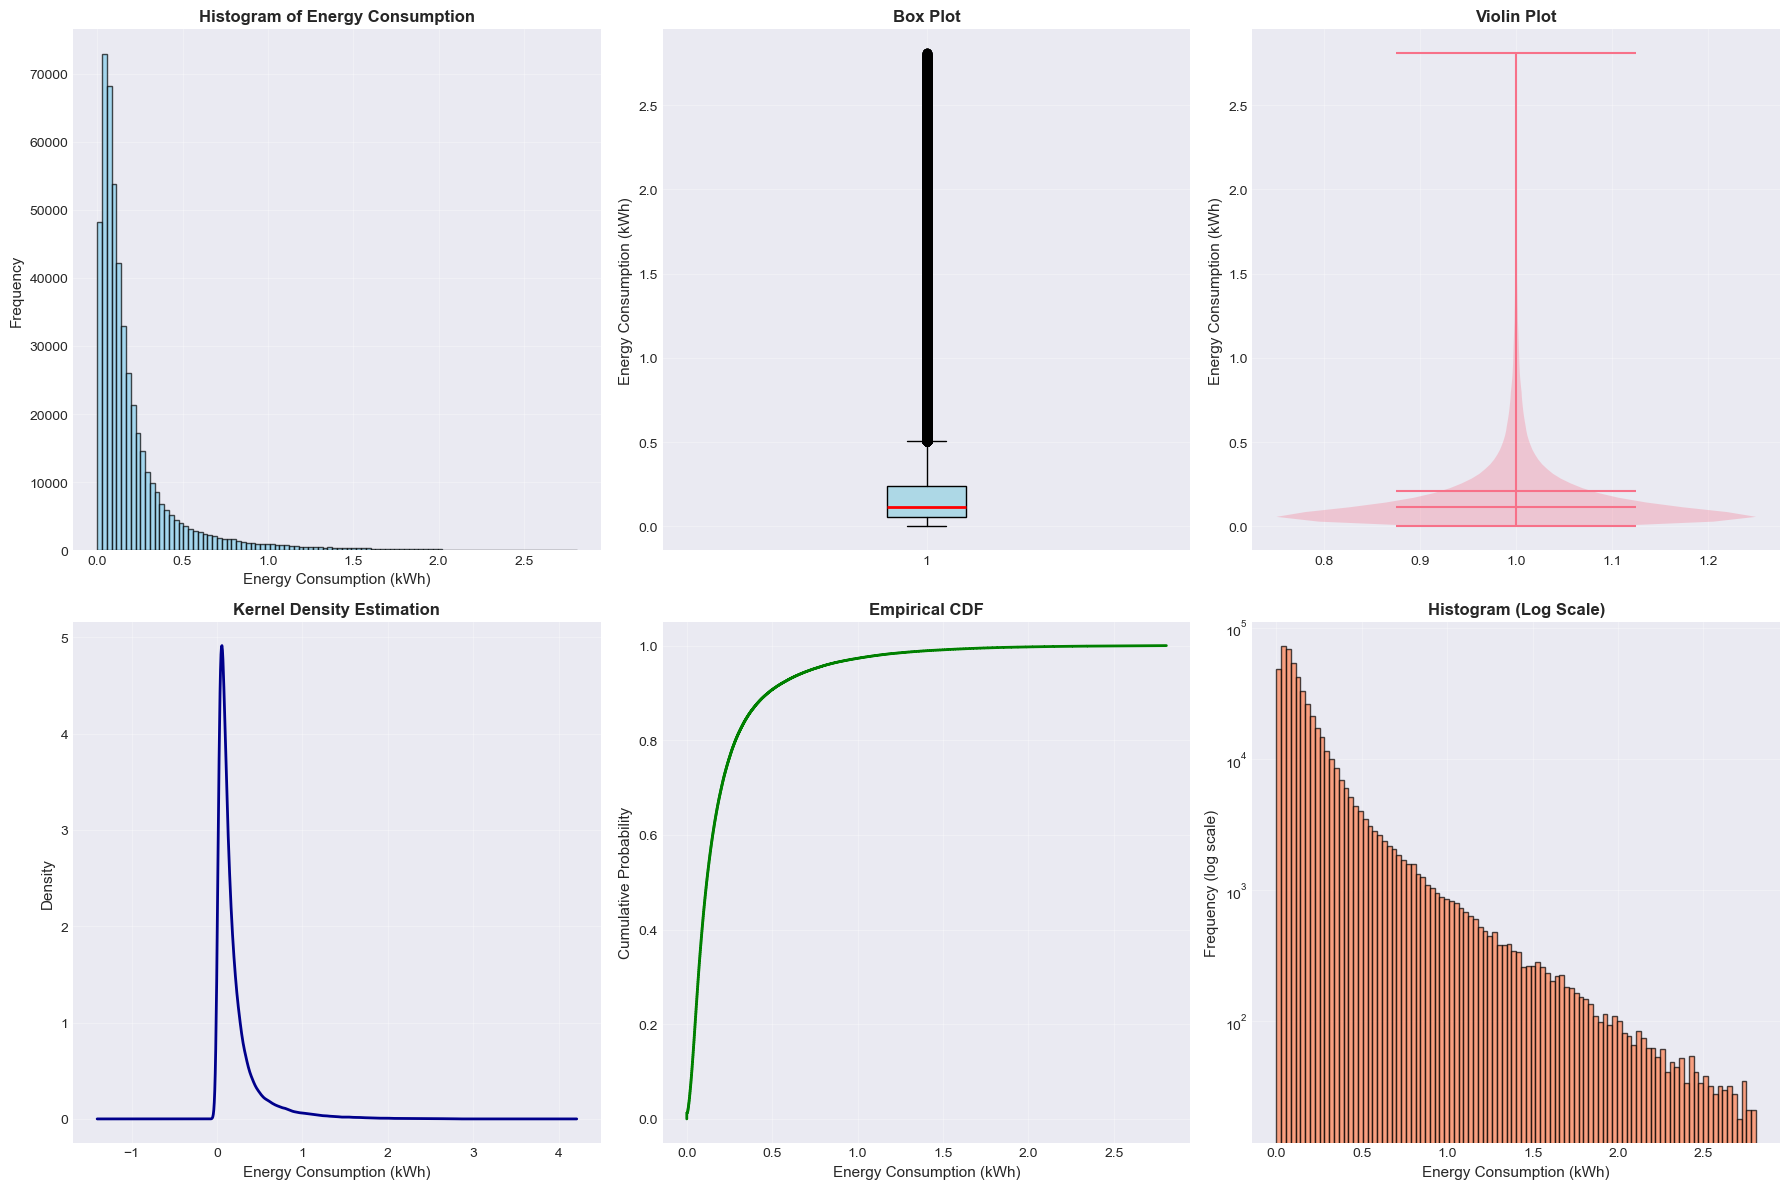

In [198]:
# Comprehensive distribution analysis
print("\n📊 ENERGY CONSUMPTION DISTRIBUTION ANALYSIS")
print("="*70)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Histogram
axes[0, 0].hist(df_final['energy_kwh'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Energy Consumption (kWh)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Histogram of Energy Consumption', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Box plot
axes[0, 1].boxplot(df_final['energy_kwh'], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue'),
                    medianprops=dict(color='red', linewidth=2))
axes[0, 1].set_ylabel('Energy Consumption (kWh)', fontsize=11)
axes[0, 1].set_title('Box Plot', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Violin plot
parts = axes[0, 2].violinplot([df_final['energy_kwh']], vert=True, showmeans=True, showmedians=True)
axes[0, 2].set_ylabel('Energy Consumption (kWh)', fontsize=11)
axes[0, 2].set_title('Violin Plot', fontsize=12, fontweight='bold')
axes[0, 2].grid(True, alpha=0.3)

# 4. KDE Plot
df_final['energy_kwh'].plot(kind='kde', ax=axes[1, 0], color='darkblue', linewidth=2)
axes[1, 0].set_xlabel('Energy Consumption (kWh)', fontsize=11)
axes[1, 0].set_ylabel('Density', fontsize=11)
axes[1, 0].set_title('Kernel Density Estimation', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 5. Cumulative Distribution
sorted_data = np.sort(df_final['energy_kwh'])
cumulative = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
axes[1, 1].plot(sorted_data, cumulative, color='green', linewidth=2)
axes[1, 1].set_xlabel('Energy Consumption (kWh)', fontsize=11)
axes[1, 1].set_ylabel('Cumulative Probability', fontsize=11)
axes[1, 1].set_title('Empirical CDF', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

# 6. Log-scale histogram
axes[1, 2].hist(df_final['energy_kwh'], bins=100, color='coral', edgecolor='black', alpha=0.7)
axes[1, 2].set_xlabel('Energy Consumption (kWh)', fontsize=11)
axes[1, 2].set_ylabel('Frequency (log scale)', fontsize=11)
axes[1, 2].set_yscale('log')
axes[1, 2].set_title('Histogram (Log Scale)', fontsize=12, fontweight='bold')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 6.6 Normality Tests

In [201]:
# Normality tests
print("\n📊 NORMALITY TESTS FOR ENERGY CONSUMPTION")
print("="*70)

# Shapiro-Wilk test (sample due to size limitations)
sample_data = df_final['energy_kwh'].sample(5000, random_state=42)
shapiro_stat, shapiro_p = shapiro(sample_data)

print(f"Shapiro-Wilk Test (sample n=5000):")
print(f"  Statistic: {shapiro_stat:.6f}")
print(f"  P-value: {shapiro_p:.6e}")

# D'Agostino's K^2 Test
dagostino_stat, dagostino_p = normaltest(df_final['energy_kwh'])

print(f"\nD'Agostino's K² Test:")
print(f"  Statistic: {dagostino_stat:.6f}")
print(f"  P-value: {dagostino_p:.6e}")

# Anderson-Darling test
anderson_result = anderson(df_final['energy_kwh'])

print(f"\nAnderson-Darling Test:")
print(f"  Statistic: {anderson_result.statistic:.6f}")
print(f"  Critical Values: {anderson_result.critical_values}")
print(f"  Significance Levels: {anderson_result.significance_level}%")

print("\n" + "="*70)
print("INTERPRETATION:")
print("="*70)
if shapiro_p < 0.05 and dagostino_p < 0.05:
    print("✓ Data is NOT normally distributed (p < 0.05 for both tests)")
    print("  This is expected for energy consumption data.")
    print("  Non-parametric methods or transformations may be needed.")
else:
    print("✓ Data shows some evidence of normality")


📊 NORMALITY TESTS FOR ENERGY CONSUMPTION
Shapiro-Wilk Test (sample n=5000):
  Statistic: 0.638436
  P-value: 2.690319e-73

D'Agostino's K² Test:
  Statistic: 371470.038291
  P-value: 0.000000e+00

Anderson-Darling Test:
  Statistic: 51732.923759
  Critical Values: [0.576 0.656 0.787 0.918 1.092]
  Significance Levels: [15.  10.   5.   2.5  1. ]%

INTERPRETATION:
✓ Data is NOT normally distributed (p < 0.05 for both tests)
  This is expected for energy consumption data.
  Non-parametric methods or transformations may be needed.


### 6.7 Correlation Analysis


📊 CORRELATION ANALYSIS

Correlation Matrix:


,energy_kwh,year,month,day,hour,dayofweek,quarter,is_weekend
energy_kwh,1.0000,0.0220,-0.0238,-0.0012,0.1867,0.0123,-0.0254,0.0164
year,0.0220,1.0000,-0.4807,-0.0422,0.0104,-0.0074,-0.4617,-0.0126
month,-0.0238,-0.4807,1.0000,0.0219,-0.0038,0.0017,0.9738,0.0113
day,-0.0012,-0.0422,0.0219,1.0000,-0.0044,-0.0043,0.0248,-0.0156
hour,0.1867,0.0104,-0.0038,-0.0044,1.0000,0.0056,-0.0033,0.0036
dayofweek,0.0123,-0.0074,0.0017,-0.0043,0.0056,1.0000,-0.0081,0.7917
quarter,-0.0254,-0.4617,0.9738,0.0248,-0.0033,-0.0081,1.0000,0.0012
is_weekend,0.0164,-0.0126,0.0113,-0.0156,0.0036,0.7917,0.0012,1.0000


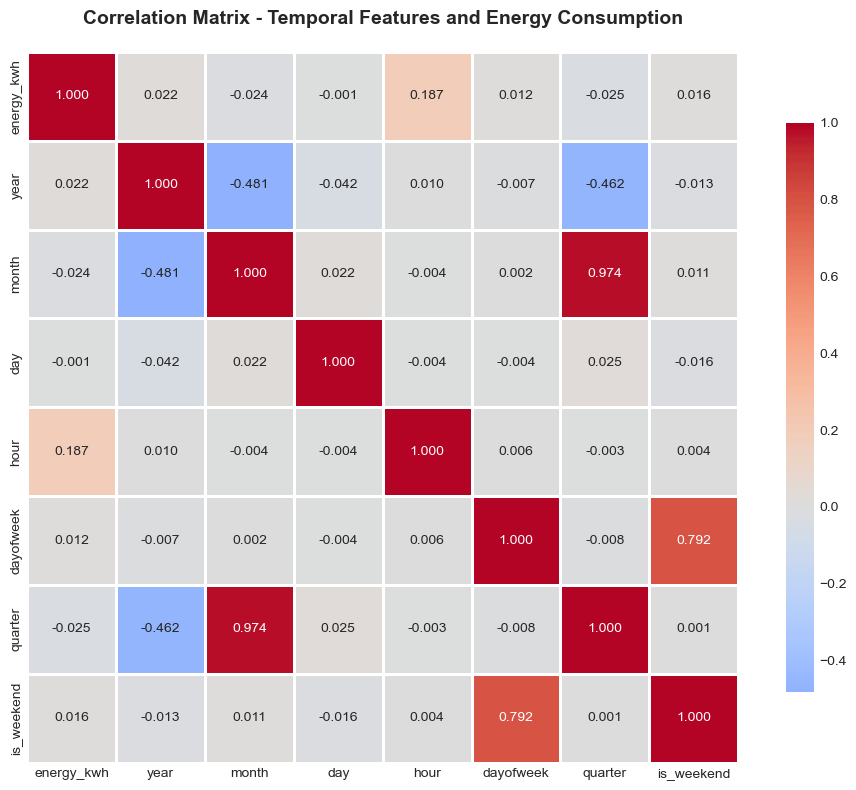


📊 CORRELATIONS WITH ENERGY CONSUMPTION:


energy_kwh    1.0000
hour          0.1867
year          0.0220
is_weekend    0.0164
dayofweek     0.0123
day          -0.0012
month        -0.0238
quarter      -0.0254
Name: energy_kwh, dtype: float64

In [204]:
# Correlation matrix for numerical features
print("\n📊 CORRELATION ANALYSIS")
print("="*70)

# Select numerical columns for correlation
numerical_cols = ['energy_kwh', 'year', 'month', 'day', 'hour', 'dayofweek', 'quarter', 'is_weekend']
corr_matrix = df_final[numerical_cols].corr()

print("\nCorrelation Matrix:")
display(corr_matrix.round(4))

# Visualize correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix - Temporal Features and Energy Consumption', 
             fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Correlations with energy_kwh
print("\n📊 CORRELATIONS WITH ENERGY CONSUMPTION:")
print("="*70)
energy_corr = corr_matrix['energy_kwh'].sort_values(ascending=False)
display(energy_corr)

### 6.8 Energy Poverty Indicators

In [207]:
# Identify potential energy poverty patterns
print("\n🔍 ENERGY POVERTY INDICATORS")
print("="*70)

# Define thresholds for potential energy poverty
# Using 10th percentile as a threshold for low consumption
low_consumption_threshold = df_final['energy_kwh'].quantile(0.10)

print(f"10th Percentile (Low Consumption Threshold): {low_consumption_threshold:.4f} kWh")

# Household-level analysis for energy poverty
household_poverty_indicators = household_stats.copy()
household_poverty_indicators['potential_energy_poverty'] = (
    household_poverty_indicators['Mean_Consumption'] <= low_consumption_threshold
).astype(int)

# Count households in potential energy poverty
poverty_count = household_poverty_indicators['potential_energy_poverty'].sum()
poverty_pct = (poverty_count / len(household_poverty_indicators)) * 100

print(f"\nHouseholds with Potential Energy Poverty: {poverty_count:,} ({poverty_pct:.2f}%)")
print(f"Households NOT in Energy Poverty: {len(household_poverty_indicators) - poverty_count:,} ({100-poverty_pct:.2f}%)")

# Display sample of potential energy poverty households
print("\n📋 SAMPLE OF POTENTIAL ENERGY POVERTY HOUSEHOLDS:")
print("="*70)
poverty_households = household_poverty_indicators[
    household_poverty_indicators['potential_energy_poverty'] == 1
].sort_values('Mean_Consumption')

display(poverty_households.head(20))


🔍 ENERGY POVERTY INDICATORS
10th Percentile (Low Consumption Threshold): 0.0290 kWh

Households with Potential Energy Poverty: 57 (1.02%)
Households NOT in Energy Poverty: 5,508 (98.98%)

📋 SAMPLE OF POTENTIAL ENERGY POVERTY HOUSEHOLDS:


,Record_Count,Mean_Consumption,Median_Consumption,Std_Dev,Total_Consumption,Min_Consumption,Max_Consumption,potential_energy_poverty
household_id,,,,,,,,
MAC000037,117,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1
MAC004067,93,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1
MAC002594,86,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1
MAC002110,1,0.0000,0.0000,NaN,0.0000,0.0000,0.0000,1
MAC000197,117,0.0001,0.0000,0.0008,0.0090,0.0000,0.0090,1
MAC001309,94,0.0007,0.0000,0.0037,0.0640,0.0000,0.0270,1
MAC004672,84,0.0045,0.0000,0.0163,0.3750,0.0000,0.0810,1
MAC002388,96,0.0060,0.0050,0.0035,0.5730,0.0000,0.0110,1
MAC005069,92,0.0061,0.0000,0.0140,0.5650,0.0000,0.0900,1


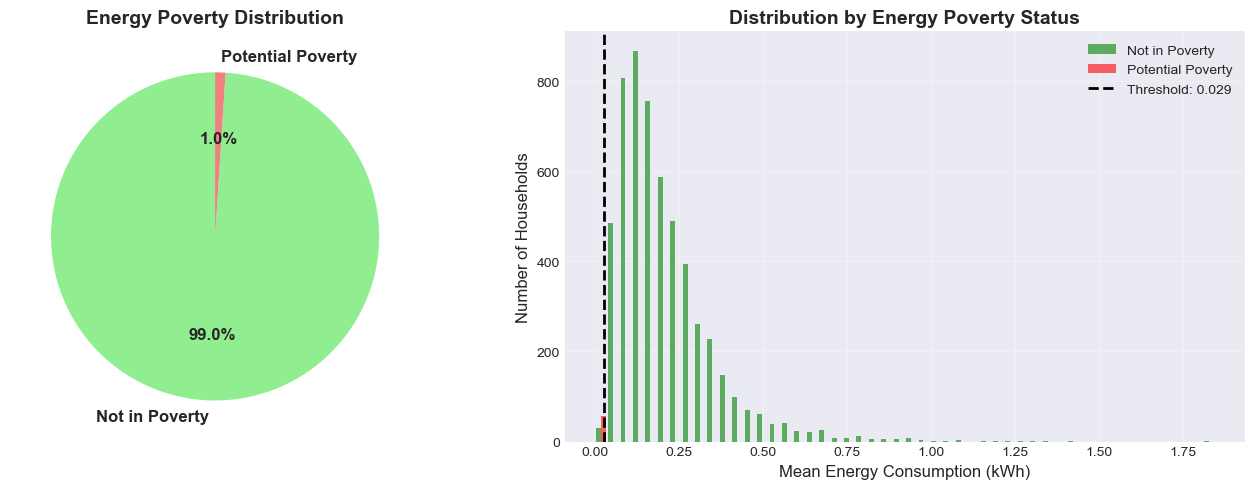

In [209]:
# Visualize energy poverty distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
poverty_counts = household_poverty_indicators['potential_energy_poverty'].value_counts()
labels = ['Not in Poverty', 'Potential Poverty']
colors = ['lightgreen', 'lightcoral']
axes[0].pie(poverty_counts.values, labels=labels, autopct='%1.1f%%',
            startangle=90, colors=colors, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[0].set_title('Energy Poverty Distribution', fontsize=14, fontweight='bold')

# Histogram comparing distributions
axes[1].hist([household_poverty_indicators[household_poverty_indicators['potential_energy_poverty']==0]['Mean_Consumption'],
              household_poverty_indicators[household_poverty_indicators['potential_energy_poverty']==1]['Mean_Consumption']],
             bins=50, label=['Not in Poverty', 'Potential Poverty'], color=['green', 'red'], alpha=0.6)
axes[1].axvline(low_consumption_threshold, color='black', linestyle='--', linewidth=2, 
                label=f'Threshold: {low_consumption_threshold:.3f}')
axes[1].set_xlabel('Mean Energy Consumption (kWh)', fontsize=12)
axes[1].set_ylabel('Number of Households', fontsize=12)
axes[1].set_title('Distribution by Energy Poverty Status', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 6.9 Summary Statistics Table

In [212]:
# Comprehensive summary statistics
print("\n📊 COMPREHENSIVE SUMMARY STATISTICS")
print("="*70)

summary_stats = pd.DataFrame({
    'Metric': [
        'Total Records',
        'Unique Households',
        'Date Range',
        'Total Days Covered',
        'Mean Energy Consumption (kWh)',
        'Median Energy Consumption (kWh)',
        'Std Dev Energy Consumption',
        'Min Energy Consumption (kWh)',
        'Max Energy Consumption (kWh)',
        'Skewness',
        'Kurtosis',
        'Zero Consumption Records',
        'Std Tariff %',
        'ToU Tariff %',
        'Potential Energy Poverty Households',
        'Mean Records per Household',
        'Weekend Records %'
    ],
    'Value': [
        f"{len(df_final):,}",
        f"{df_final['household_id'].nunique():,}",
        f"{df_final['timestamp'].min().strftime('%Y-%m-%d')} to {df_final['timestamp'].max().strftime('%Y-%m-%d')}",
        f"{(df_final['timestamp'].max() - df_final['timestamp'].min()).days}",
        f"{df_final['energy_kwh'].mean():.4f}",
        f"{df_final['energy_kwh'].median():.4f}",
        f"{df_final['energy_kwh'].std():.4f}",
        f"{df_final['energy_kwh'].min():.4f}",
        f"{df_final['energy_kwh'].max():.4f}",
        f"{df_final['energy_kwh'].skew():.4f}",
        f"{df_final['energy_kwh'].kurtosis():.4f}",
        f"{len(df_final[df_final['energy_kwh']==0]):,} ({(len(df_final[df_final['energy_kwh']==0])/len(df_final))*100:.2f}%)",
        f"{(df_final['tariff_type'].value_counts()['Std']/len(df_final))*100:.2f}%" if 'Std' in df_final['tariff_type'].values else "N/A",
        f"{(df_final['tariff_type'].value_counts()['ToU']/len(df_final))*100:.2f}%" if 'ToU' in df_final['tariff_type'].values else "N/A",
        f"{poverty_count:,} ({poverty_pct:.2f}%)",
        f"{household_stats['Record_Count'].mean():.2f}",
        f"{(df_final['is_weekend'].sum()/len(df_final))*100:.2f}%"
    ]
})

display(summary_stats)

print("\n" + "="*70)
print("✓ EXPLORATORY DATA ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*70)


📊 COMPREHENSIVE SUMMARY STATISTICS


,Metric,Value
0,Total Records,"499,482"
1,Unique Households,"5,560"
2,Date Range,2011-11-23 to 2014-02-28
3,Total Days Covered,827
4,Mean Energy Consumption (kWh),0.2080
5,Median Energy Consumption (kWh),0.1160
6,Std Dev Energy Consumption,0.2765
7,Min Energy Consumption (kWh),0.0000
8,Max Energy Consumption (kWh),2.8080
9,Skewness,3.4997



✓ EXPLORATORY DATA ANALYSIS COMPLETED SUCCESSFULLY!


## 7. Save Cleaned Dataset

In [223]:
output_filename = 'energy_data_cleaned_final.csv'

print("\n💾 SAVING CLEANED DATASET")
print("="*70)

# Save in the current directory (where your other files are)
df_final.to_csv(output_filename, index=False)

print(f"✓ Cleaned dataset saved to: {output_filename}")
print(f"✓ Location: {os.getcwd()}")
print(f"✓ Shape: {df_final.shape[0]:,} rows × {df_final.shape[1]} columns")

# Check file size
if os.path.exists(output_filename):
    file_size_mb = os.path.getsize(output_filename) / (1024**2)
    print(f"✓ File size: {file_size_mb:.2f} MB")
    
print("\n📁 Files in your Dissertation folder:")
for file in sorted(os.listdir('.')):
    if file.endswith('.csv') or file.endswith('.ipynb'):
        size = os.path.getsize(file) / (1024**2)
        print(f"   - {file} ({size:.2f} MB)")


💾 SAVING CLEANED DATASET
✓ Cleaned dataset saved to: energy_data_cleaned_final.csv
✓ Location: C:\Users\papak\OneDrive - Southampton Solent University\Desktop\Dissertation
✓ Shape: 499,482 rows × 13 columns
✓ File size: 34.11 MB

📁 Files in your Dissertation folder:
   - CC_LCL-FullData.csv (8147.07 MB)
   - Untitled.ipynb (1.30 MB)
   - energy_data_cleaned_final.csv (34.11 MB)
   - energy_data_sampled_500k.csv (24.26 MB)
